<a href="https://colab.research.google.com/github/sera0911/asia_ai_project/blob/main/1st_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <<< 2조 미니 프로젝트 >>>      
주제 : 코로나19 확산에 따른 전자상거래 거래량 변동 추이 분석   
팀장 : 김영현  
팀원 : 김광휘, 홍두기, 심세경, 백승훈  
프로젝트 수행방향 (Direction)   
1. 코로나19 확진자 발생현황 확인   
2. 전자상거래 거래액 증감 파악   
  2-1. 2018년 대비 2019년 전자상거래 거래액 증감량 확인    
  2-2. 2019년 대비 2020년 전자상거래 거래액 증감량 확인  
  2-3. 2019년 증감량 대비 2020년 증감량 비교   
3. 최대 거래 상품군 조사 및 분석  
  3-1. 최대 거래 상품군 추출   
  3-2. 연도별 주요 5개 상품군 구성 및 비율 변화 파악   
  3-3. 상품군별 최대 판매 상품 판매 경로 파악   
4. 상품군별 전년 대비 거래량2019-18 대비 2020-2019 변동 파악  
  4-1. 전년 대비 거래량 최대 증가 상품군 파악  
  4-2. 전년 대비 거래량 최대 감소 상품군 파악  
  4-3. 전년 대비 거래량 변화가 적은 상품군 파악  
5. 향후 코로나 추이에 따른 전자상거래 소비 예측  

프로젝트 수행 도구  

＊수행도구   
Python   
Pandas   
Seaborn      
* 데이터   
통계청 국가통계포털(https://kosis.kr/) - 온라인 쇼핑 동향     
  


In [20]:
import numpy as np

# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams.update({"axes.grid" : True})

plt.rcParams["figure.figsize"] = (15,6)
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

np.random.seed(42)
 
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 


import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


#### 데이터 분석, 전저리

In [21]:
import pandas as pd      # Dataframe 생성위해 pandas import
import csv               # csv 파일 로드 위해 csv import

route = "onlineshop_turnover.csv"
        # csv 파일 저장위치 경로 입력

f = open(route,encoding='euc-kr')     # csv file open, encoding 지정

source = csv.reader(f)     # csv file load해서 source에 메모리


data = []        # csv 파일을 data, column, index로 분리위해
cols = 0         # 각각 빈 data, cols, idx 변수 선언
idx = [[], []]

for x, row in enumerate(source):     # source에 저장한 데이터를 각 index와 함께 추출
    if x == 0:
        cols = row[2:]     # source index 0은 column으로, 추출해서 cols로 저장
        continue
    data.append([])        # 각 행별로 데이터 리스트 저장위해 data 변수에 빈 리스트 추가
    for i in range(2, 52):
       data[x - 1].append(int(row[i].replace(",", "")))     # 데이터 내 구분자 ',' 제거
    idx[0].append(row[0])     # 다중인덱스 구성위해 상위 인덱스 추출해서 idx[0]에 저장
    idx[1].append(row[1])     #                  하위 인덱스 추출해서 idx[1]에 저장


for i in range(len(idx[0])):     # 상위 인덱스 내 중복으로 생략된 인덱스를 입력
    if i % 3 == 0:
        continue
    else:
        idx[0][i] = idx[0][((i // 3) * 3)]


f.close()    # open 했던 csv 파일 close

df = pd.DataFrame(data, columns=cols, index=idx)     # Dataframe 생성
print(data[0])
print(df.head(10))     # Dataframe 생성 테스트

[7310479, 7148849, 7747011, 7380795, 7621719, 7515130, 7898554, 7859658, 8151143, 7661802, 8996978, 8893647, 9027008, 8207296, 9375766, 9034274, 9363224, 8965075, 9653420, 9270381, 9137279, 10016442, 10574144, 10689701, 10811796, 9666871, 11296239, 10763785, 11374817, 10725166, 11302975, 11418155, 11397646, 12008033, 12991605, 12843750, 12308866, 11945935, 12575341, 12053828, 12748344, 12678358, 12966841, 13496390, 13857627, 13884207, 15031417, 15891202, 15077081, 13762802]
                2017. 01  2017. 02  ...  2021. 01 p)  2021. 02 p)
합계         계     7310479   7148849  ...     15077081     13762802
           종합몰   4801433   4767941  ...     10159846      9078761
           전문몰   2509046   2380908  ...      4917235      4684041
컴퓨터 및 주변기기 계      422384    475342  ...       793355       784666
           종합몰    285375    321703  ...       498486       500626
           전문몰    137009    153639  ...       294869       284040
가전·전자·통신기기 계      602122    626874  ...      1871490      1

#### 1. 코로나19 확진자 발생현황 확인

      oneday
연도          
2020   60739
2021   47530
         oneday
연도   월         
2020 1        0
     2     3150
     3     6636
     4      979
     5      703
     6     1331
     7     1506
     8     5641
     9     3865
     10    2700
     11    7690
     12   26538
2021 1    17460
     2    11470
     3    13416
     4     5184


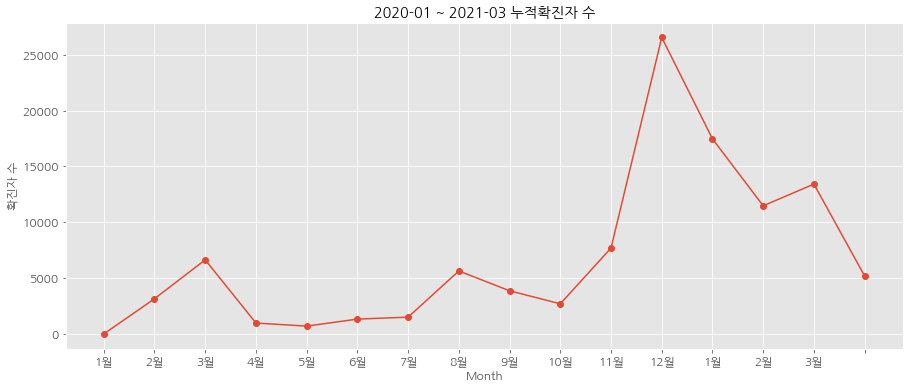

In [41]:
#import family as family
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df1 = pd.read_csv('covid_19.csv')
#print(df1.info())

df1['createDate']
df1["날짜"]= pd.to_datetime(df1['createDate'])
df1['연도']=df1["날짜"].dt.year
df1['월']=df1["날짜"].dt.month


print(pd.pivot_table(data=df1, index='연도', values='oneday', aggfunc='sum'))
print(pd.pivot_table(data=df1, index=['연도','월'], values='oneday', aggfunc='sum'))
df2= pd.pivot_table(data=df1, index=['연도','월'], values='oneday', aggfunc='sum')
# print(df2.values)  y값
# print(df2.index)   x값

plt.rcParams["font.family"] = 'NanumGothic'

x_name=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월',
         '11월','12월','1월','2월','3월']
y=df2.values
#y=[0,3150,6636,979,703,1331,1506,5641,3865,2700,7690,26538,17460,11470,13416]
x=np.arange(len(y))

plt.xticks(x,x_name)
plt.title('2020-01 ~ 2021-03 누적확진자 수')
plt.xlabel('Month')
plt.ylabel('확진자 수')

plt.plot(x,y, marker="o")
plt.show()


####  2. 전자상거래 거래액 증감 파악    
  2-1. 2018년 대비 2019년 전자상거래 거래액 증감량 확인    
  2-2. 2019년 대비 2020년 전자상거래 거래액 증감량 확인  
  2-3. 2019년 증감량 대비 2020년 증감량 비교

[7310479, 7148849, 7747011, 7380795, 7621719, 7515130, 7898554, 7859658, 8151143, 7661802, 8996978, 8893647, 9027008, 8207296, 9375766, 9034274, 9363224, 8965075, 9653420, 9270381, 9137279, 10016442, 10574144, 10689701, 10811796, 9666871, 11296239, 10763785, 11374817, 10725166, 11302975, 11418155, 11397646, 12008033, 12991605, 12843750, 12308866, 11945935, 12575341, 12053828, 12748344, 12678358, 12966841, 13496390, 13857627, 13884207, 15031417, 15891202, 15077081, 13762802]
[-5264862, -4904979, -5001333, -5297563, -5345122, -5981260, -5959073, -6024549, -6880274, -8229400, -6080103, -4869155, 1716529, 1058447, 1628755, 1653479, 1741505, 1449945, 1754866, 1410723, 986136, 2354640, 1577166, 1796054, 1784788, 1459575, 1920473, 1729511, 2011593, 1760091, 1649555, 2147774, 2260367, 1991591, 2417461, 2154049, 1497070, 2279064]
[23.48, 14.81, 21.02, 22.4, 22.85, 19.29, 22.22, 17.95, 12.1, 30.73, 17.53, 20.19, 19.77, 17.78, 20.48, 19.14, 21.48, 19.63, 17.09, 23.17, 24.74, 19.88, 22.86, 20.15, 

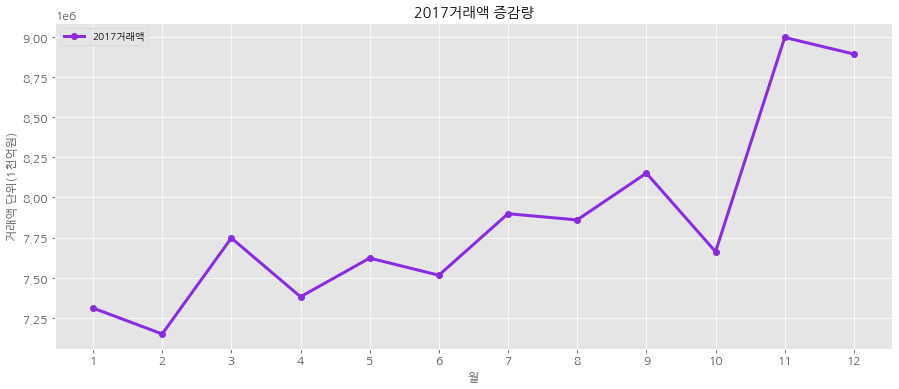

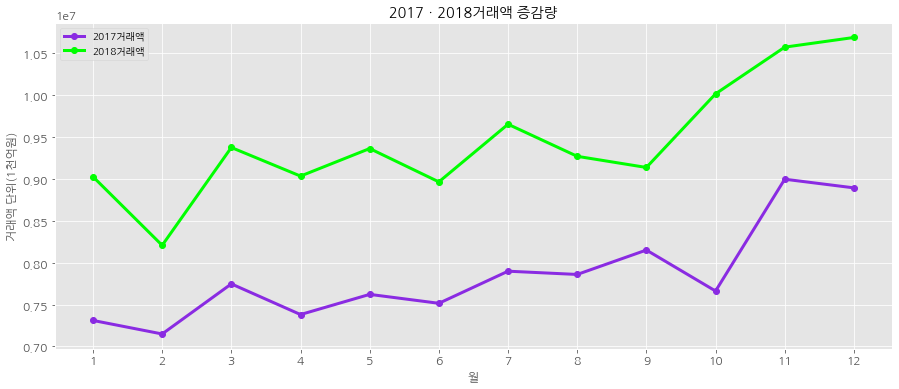

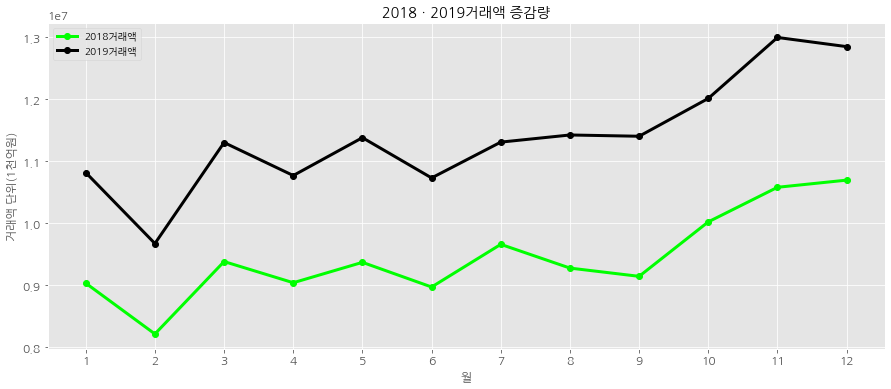

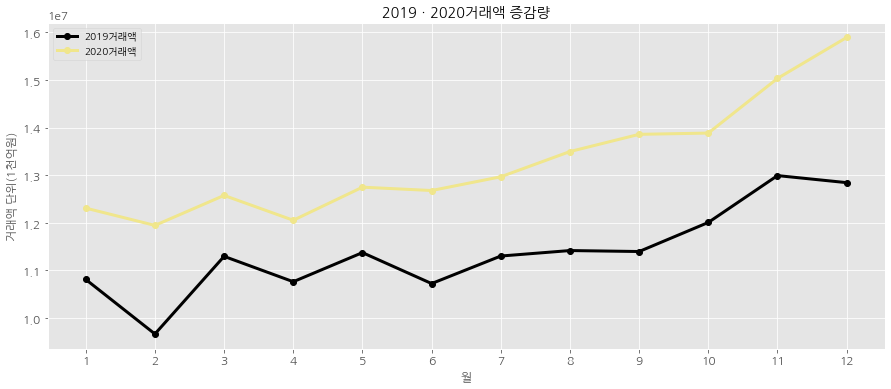

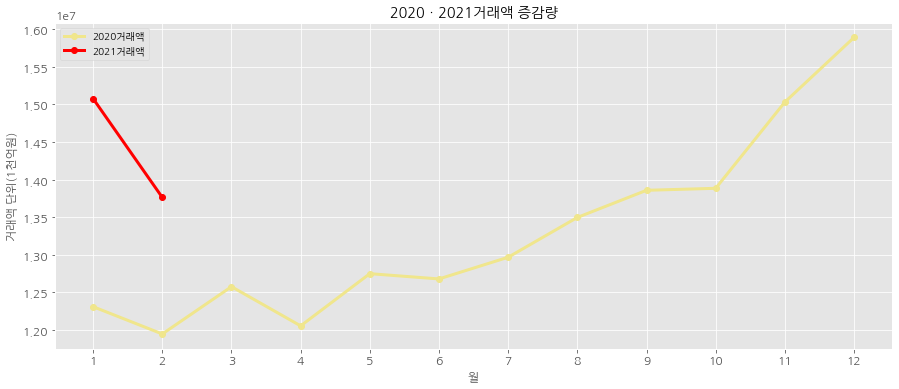

In [27]:
#김영현 코드 시작 
df1 = data
df2 = df1[0]
new_list = []
new_list_1 =[]
new_list_2 =[]
new_list_3 =[]
# 1번 
data_2017_1 = []
data_2018_1 = []
data_2019_1 = []
data_2020_1 = []
data_2021_1 = []
#2번
data_2017_2 = []
data_2018_2 = []
data_2019_2 = []
data_2020_2 = []
data_2021_2 = []
#3번
data_2017_3 = []
data_2018_3 = []
data_2019_3 = []
data_2020_3 = []
data_2021_3 = []

for row in df2 :
    new_list.append(row)

for l in range(len(new_list) - 12):#50번반복 [0] + [12]
  # print(new_list[l+12] - new_list[l] )  #12월후 당월 매출차액
  new_list_2.append(new_list[l] - new_list[l-12] )  #리스트에 담기 

  # print( (new_list[l] / new_list[l+12] - 1) * 100) 
  new_list_3.append(round((new_list[l+12] / new_list[l] - 1) * 100,2))

print(new_list)#데이터
print(new_list_2)#매출액 리스트 
print(new_list_3)#매출증감량 리스트 


data_2017_1 = new_list[0:12]#2017거래액 인덱싱
data_2018_1 = new_list[12:24]
data_2019_1 = new_list[24:36]
data_2020_1 = new_list[36:48]
data_2021_1 = new_list[48:50]

data_2018_2 = new_list_2[0:12]#전년도 거래액 차액
data_2019_2 = new_list_2[12:24]
data_2020_2 = new_list_2[24:36]
data_2021_2 = new_list_2[36:48]
data_2022_2 = new_list_2[48:60]

data_2017_3 = new_list_3[0:12]#증감율 인덱싱
data_2018_3 = new_list_3[12:24]
data_2019_3 = new_list_3[24:36]
data_2020_3 = new_list_3[36:48]
data_2021_3 = new_list_3[48:60]

print("1번 y축")
print(data_2017_1)
print(data_2018_1)
print(data_2019_1)
print(data_2020_1)
print(data_2021_1)

print("2번 y축 ")
print(data_2018_2)
print(data_2019_2)
print(data_2020_2)
print(data_2021_2)
print(data_2022_2)

print("3번 y축 ")
print(data_2017_3)
print(data_2018_3)
print(data_2019_3)
print(data_2020_3)


#################################################매출액 

#그래프세팅
import matplotlib
import matplotlib.pyplot as plt
import platform

plt.rcParams["font.family"] = 'NanumGothic'
""" #폰트안깨지게
if platform.system() == 'Darwin': 
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
    plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
    matplotlib.rc('font', family='Malgun Gothic')
"""

#거래액 그래프
plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12'], data_2017_1,'bo-', label='2017거래액',linewidth=3,color='blueviolet')
plt.xlabel('월')
plt.ylabel('거래액 단위(1천억원)')
plt.legend(loc='best') # ncol = 1
plt.title('2017거래액 증감량')
plt.show()

plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12'], data_2017_1,'bo-', label='2017거래액',linewidth=3,color='blueviolet')
plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12'], data_2018_1,'bo-', label='2018거래액',linewidth=3,color='lime')
plt.xlabel('월')
plt.ylabel('거래액 단위(1천억원)')
plt.legend(loc='best') # ncol = 1
plt.title('2017ㆍ2018거래액 증감량')
plt.show()

plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12'], data_2018_1,'bo-', label='2018거래액',linewidth=3,color='lime')
plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12'], data_2019_1,'bo-', label='2019거래액',linewidth=3,color='black')
plt.xlabel('월')
plt.ylabel('거래액 단위(1천억원)')
plt.legend(loc='best') # ncol = 1
plt.title('2018ㆍ2019거래액 증감량')
plt.show()

plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12'], data_2019_1,'bo-', label='2019거래액',linewidth=3,color='black')
plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12'], data_2020_1,'bo-', label='2020거래액',linewidth=3,color='khaki')
plt.xlabel('월')
plt.ylabel('거래액 단위(1천억원)')
plt.legend(loc='best') # ncol = 1
plt.title('2019ㆍ2020거래액 증감량')
plt.show()

plt.plot(['1','2','3','4','5','6','7','8','9','10','11','12'], data_2020_1,'bo-', label='2020거래액',linewidth=3,color='khaki')
plt.plot(['1','2'], data_2021_1,'bo-', label='2021거래액',linewidth=3,color='red')
plt.xlabel('월')
plt.ylabel('거래액 단위(1천억원)')
plt.legend(loc='best') # ncol = 1
plt.rc('font', family='Nanum')
plt.title('2020ㆍ2021거래액 증감량')
plt.rc('font', family='Nanum')
plt.show()

##### 3. 최대 거래 상품군 조사 및 분석
3-1. 최대 거래 상품군 추출

In [22]:
datas = df.values
datas.shape
len(datas)

sales = []
for i in range(len(datas)//3):
  sales.append(datas[i*3, :])

index = ['합계','컴퓨터 및 주변기기', '가전·전자·통신기기', '서적', '사무·문구', '의복', '신발','가방', 
         '패션용품 및 액세서리', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품','농축수산물', 
         '생활용품', '자동차 및 자동차용품','가구', '애완용품', '여행 및 교통서비스', '문화 및 레저서비스', 'e쿠폰서비스', '음식서비스', '기타서비스', '기타']

df2 = pd.DataFrame(sales,columns=cols, index=index)

df3 = df2.drop('합계')

#데이터프레임 형태로 합계, 순위 반환
df3['sum'] = df3.loc[:,'2020. 01':'2020. 12'].sum(axis=1)   #필요한 기간만 추출
print(df3)

df4 = df3[['sum']]          #상품별 합 출력
df5 = df4.sort_values('sum', ascending=False)     #합계별로 순위정렬
new_rank = df5.reset_index()                      #인덱스초기화해서 순위인덱스넣기
display(new_rank)           #인덱스넣은 데이터프레임 출력

chart2 = df5.iloc[:5] 

             2017. 01  2017. 02  2017. 03  ...  2021. 01 p)  2021. 02 p)       sum
컴퓨터 및 주변기기     422384    475342    473351  ...       793355       784666   7349535
가전·전자·통신기기     602122    626874    667726  ...      1871490      1647492  18138172
서적             151230    154330    185571  ...       258758       213450   2414991
사무·문구           53192     60403     70006  ...        98060        93788   1087437
의복             864515    827672   1042742  ...      1090386      1001316  15015374
신발             103798    118631    153293  ...       202779       214468   2879403
가방             143643    163204    168660  ...       228206       237356   2730073
패션용품 및 액세서리    143439    146885    165677  ...       177334       162887   2254470
스포츠·레저용품       201380    207110    257361  ...       392961       362752   5369615
화장품            654145    729228    715294  ...      1080643       900562  12431054
아동·유아용품        259790    262204    300200  ...       411540       379590   4855652
음·식료

,index,sum
0,음·식료품,19679385
1,가전·전자·통신기기,18138172
2,음식서비스,17333615
3,의복,15015374
4,생활용품,14505193
5,화장품,12431054
6,여행 및 교통서비스,8234723
7,컴퓨터 및 주변기기,7349535
8,농축수산물,6213105
9,스포츠·레저용품,5369615


In [23]:
#한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


(-1.25, 1.25, -1.25, 1.25)

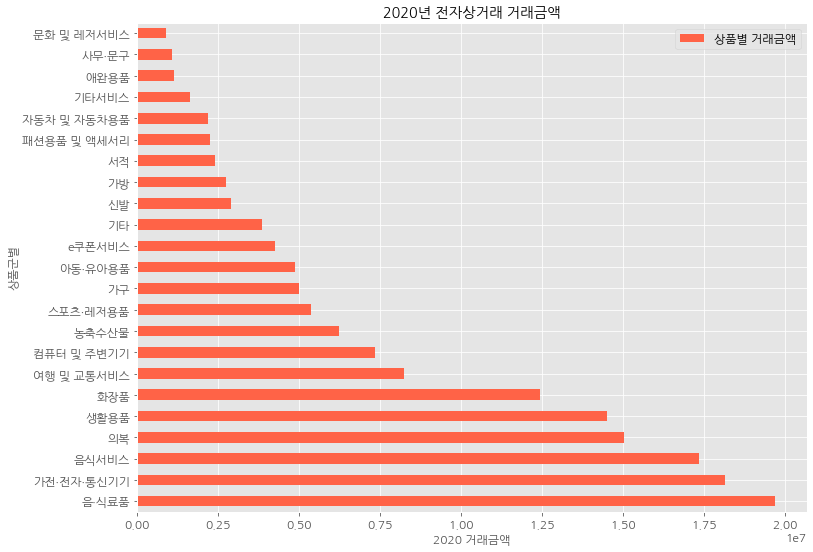

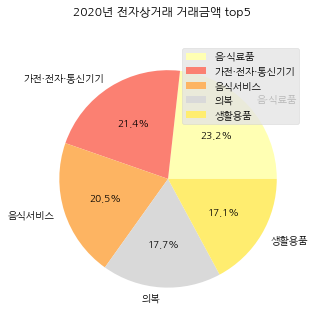

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style


mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.

plt.style.use('ggplot')
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = df5.plot(kind='barh', title='2020년 전자상거래 거래금액', figsize=(12,9), legend=True, fontsize=12,color='tomato')
ax.set_xlabel('2020 거래금액', fontsize=12)          # x축 정보 표시
ax.set_ylabel('상품군별', fontsize=12)     # y축 정보 표시
ax.legend(['상품별 거래금액'], fontsize=12)    # 범례 지정


cmap = plt.get_cmap("Set3")
colors = cmap([1,3, 5, 8 ,11])

ax = chart2.plot(kind='pie', title='2020년 전자상거래 거래금액 top5', figsize=(7, 5),subplots=True, legend=True, fontsize=10, autopct='%.1f%%', colors=colors)
plt.axis('off')

#### 3-2. 연도별 주요 5개 상품군 구성 및 비율 변화 파악

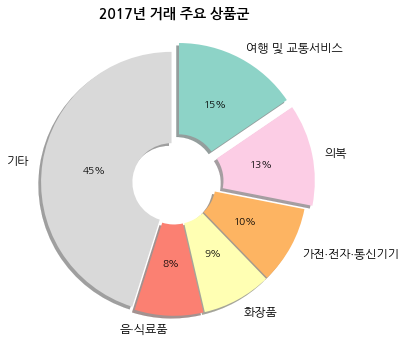

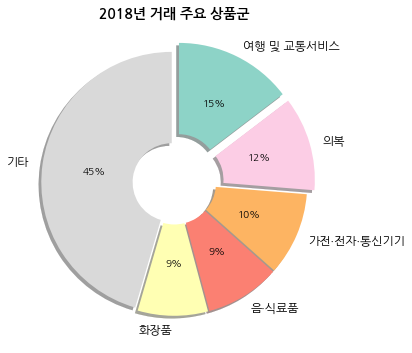

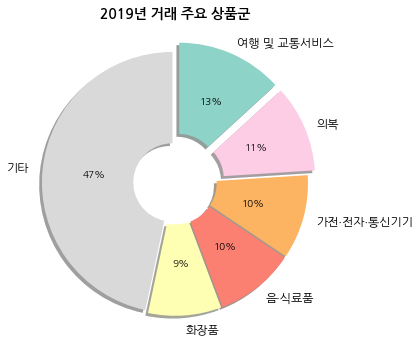

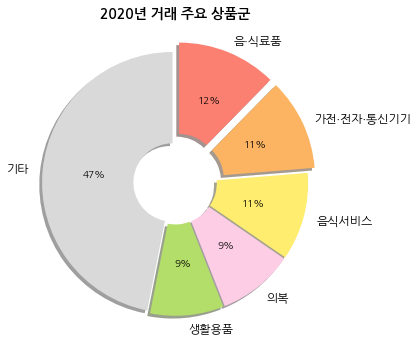

In [30]:
df_sums= df.loc[(slice(None),"계"),:]      # 각 상품군별 합계금액만 추출

df_17s = pd.DataFrame(df_sums.loc[:,"2017. 01":"2017. 12"].sum(axis=1), columns=["17s"])       # 상품군별 연도 합계 시리즈 생성
df_18s = pd.DataFrame(df_sums.loc[:,"2018. 01":"2018. 12"].sum(axis=1), columns=["18s"])
df_19s = pd.DataFrame(df_sums.loc[:,"2019. 01":"2019. 12"].sum(axis=1), columns=["19s"])
df_20s = pd.DataFrame(df_sums.loc[:,"2020. 01":"2020. 12"].sum(axis=1), columns=["20s"])
dfs = [df_17s, df_18s, df_19s, df_20s]     # 반복문 사용위해 연도별 시리즈로 구성된 리스트 선언

for x,i in enumerate(dfs):     # 시리즈와 해당 인덱스를 함께 추출
    i.sort_values(by=str(x+17)+"s", ascending=False, inplace=True)     # 시리즈내 합계금액 큰 순으로 정렬하고 변경사항 저장
    i["ratio"] = 0      # 시리즈에 ratio 컬럼 추가 (시리즈가 dataframe으로 전환됨)
    for j in range(len(i)):     # 각 시리즈의 데이터 개수만큼 반복문 수행 설정
        i.iloc[j,1] = round(i.iloc[j,0] / i.iloc[0,0] *100,2)     # ratio 컬럼에 연도 합계금액 대비 해당 상품군 거래금액 비율 입력
    i.drop(("합계", "계"), axis=0, inplace=True)      # 연도 합계금액 삭제
    i.drop(i.index[5:], axis=0, inplace=True)        # 최대거래금액 5 상품군 외 데이터 행 삭제
    i.loc[("기타","계"),:] = 100 - i.iloc[:,1].sum(axis=0)  # 4.12 추가내용 : 기타 부분 합계 추가

# print(df_17s,"\n")      # dataframe test 출력
# print(df_18s,"\n")
# print(df_19s,"\n")
# print(df_20s,"\n")




import matplotlib.pyplot as plt     # 시각화 위한 matplotlib 모듈 호출

for y,i in enumerate(dfs):      # 데이터프레임과 인덱스를 함께 추출
    ratio = i["ratio"]          # 차트에 사용할 데이터 값 지정(전체금액 대비 상품군의 거래비율)
    labels = [str(x[0]) for x in i.index]      # 차트에 사용할 label 값 지정
    explode = [0.08, 0.08, 0.02, 0.02, 0.02, 0.02]   # pie 차트에서 1,2위 상품군을 offset되어 보이도록 설정
    # print(len(ratio))      # 변수내 저장된 item 개수 및 내용 test 출력
    # print(len(labels))
    # print(labels)


    cmap = plt.get_cmap("Set3")     # 컬러맵 지정
    color = []                      # 차트 작성 시 각 항목별 색상 지정위해 빈 리스트 생성
    for j in range(len(labels)):
        if labels[j] == "여행 및 교통서비스":     # labels에 저장된 순서에 따라 항목에 해당하는 색상 부여
            color.append(0)
        elif labels[j] == '의복':
            color.append(7)
        elif labels[j] == '가전·전자·통신기기':
            color.append(5)
        elif labels[j] =='음·식료품':
            color.append(3)
        elif labels[j] =='화장품':
            color.append(1)
        elif labels[j] =='음식서비스':
            color.append(11)
        elif labels[j] == '생활용품':
            color.append(6)
        elif labels[j] == '기타':
            color.append(8)
        else:
            break

    colors = cmap(color)      # 항목별로 부여된 색상번호를 확정
    wedgeprops={'width': 0.7, 'linewidth': 0.2}       # pie 차트의 속성 부여
    plt.rcParams["font.family"] = 'NanumGothic'
    title_font = {'fontsize': 14, 'fontweight': 'bold'}       # 제목폰트 설정 지정
    plt.title(str(2017+y)+'년 거래 주요 상품군', fontdict=title_font, loc='Center', pad=0)     # 타이틀 속성 지정
    plt.pie(ratio, labels=labels, autopct='%.f%%', startangle=90, counterclock=False,
                explode=explode, shadow=True, colors=colors, wedgeprops=wedgeprops)     # pie 차트 생성
    plt.savefig(str(2017+y)+'년 거래 주요 상품군.png', bbox_inches='tight', pad_inches=0.3)      # 생성된 차트 저장
    # ratio._clear_item_cache()    # 사용변수 초기화
    # labels.clear()
    # color.clear()
    plt.show()        # 생성된 차트 확인

#### 3-3. 상품군별 최대 판매 상품 판매 경로 파악

sum
total      route           
합계         계      159438356
           종합몰    108310602
           전문몰     51127754
컴퓨터 및 주변기기 계        7349535
           종합몰      4871526
           전문몰      2478009
가전·전자·통신기기 계       18138172
           종합몰     15797715
           전문몰      2340457
서적         계        2414991

,종합몰,전문몰
total,,
합계,108310602,51127754
컴퓨터 및 주변기기,4871526,2478009
가전·전자·통신기기,15797715,2340457
서적,854910,1560081
사무·문구,809544,277893
의복,8008212,7007162
신발,1573350,1306053
가방,2297940,432133
패션용품 및 액세서리,1672955,581515


                   종합몰       전문몰 최대이용       이용비율       금액차
total                                                     
합계           108310602  51127754  종합몰  67.932588  57182848
컴퓨터 및 주변기기     4871526   2478009  종합몰  66.283459   2393517
가전·전자·통신기기    15797715   2340457  종합몰  87.096511  13457258
서적              854910   1560081  전문몰  64.599868    705171
사무·문구           809544    277893  종합몰  74.445140    531651
의복             8008212   7007162  종합몰  53.333417   1001050
신발             1573350   1306053  종합몰  54.641535    267297
가방             2297940    432133  종합몰  84.171376   1865807
패션용품 및 액세서리    1672955    581515  종합몰  74.206133   1091440
스포츠·레저용품       4577866    791749  종합몰  85.255014   3786117
화장품           11310363   1120691  종합몰  90.984747  10189672
아동·유아용품        4380162    475490  종합몰  90.207494   3904672
음·식료품         16827585   2851800  종합몰  85.508693  13975785
농축수산물          5128819   1084286  종합몰  82.548404   4044533
생활용품          13031960   1473233  종합몰  89.843410  115587

total
컴퓨터 및 주변기기     종합몰
가전·전자·통신기기     종합몰
서적             전문몰
사무·문구          종합몰
의복             종합몰
신발             종합몰
가방             종합몰
패션용품 및 액세서리    종합몰
스포츠·레저용품       종합몰
화장품            종합몰
아동·유아용품        종합몰
음·식료품          종합몰
농축수산물          종합몰
생활용품           종합몰
자동차 및 자동차용품    종합몰
가구             종합몰
애완용품           종합몰
여행 및 교통서비스     전문몰
문화 및 레저서비스     전문몰
e쿠폰서비스         종합몰
음식서비스          전문몰
기타서비스          종합몰
기타             종합몰
Name: 최대이용, dtype: object

(-1.25, 1.25, -1.25, 1.25)

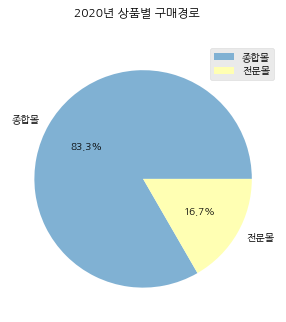

In [25]:
#경로별 합계 데이터 추출
df2 = df    

df2['sum'] = df2.loc[:, '2020. 01':'2020. 12'].sum(axis=1)   #필요한 기간만 추출

#df4 = df3[['sum']]    
df3 = df2[['sum']] 
df3.index.names = ["total", "route"]
display(df3.head(10))

one = df3.loc[(slice(None), "종합몰"),:]
two = df3.loc[(slice(None), "전문몰"),:]

df4 = pd.merge(one, two, on='total')
df4.rename({'sum_x':'종합몰', 'sum_y':'전문몰'}, axis='columns', inplace=True)
display(df4)

df4["최대이용"] = 0
df4["이용비율"] = 0
df4["금액차"] = abs(df4["종합몰"]-df4["전문몰"])  #두 금액을 빼서 절대값을 구함
for i in range(len(df4)):
    if df4.iloc[i,0] > df4.iloc[i,1]:   #두 경로의 위치를 반환해 금액비교
        df4.iloc[i,2] = "종합몰"
        df4.iloc[i,3] = (df4.iloc[i,0] /(df4.iloc[i,0] + df4.iloc[i,1]))  * 100  #비율계산
    else:
        df4.iloc[i,2] = "전문몰"
        df4.iloc[i,3] = (df4.iloc[i,1] /(df4.iloc[i,0] + df4.iloc[i,1]))  * 100

print(df4)

df5 =  df4['최대이용']
df6 = df5.drop('합계')
display(df6)


df7 = df4['최대이용'].value_counts()
#display(df7)
#labels = df6.loc['total']

cmap = plt.get_cmap("Set3")
colors = cmap([4,1])

ax = df7.plot(kind='pie', title='2020년 상품별 구매경로', 
                 figsize=(7, 5),subplots=True, legend=True, fontsize=10, autopct='%.1f%%', 
                 colors=colors)
plt.axis('off')

4. 상품군별 전년 대비 거래량2019-18 대비 2020-2019 변동 파악   
  4-1. 전년 대비 거래량 최대 증가 상품군 파악   
  4-2. 전년 대비 거래량 최대 감소 상품군 파악   
  4-3. 전년 대비 거래량 변화가 적은 상품군 파악    


In [ ]:
import matplotlib.ticker as mtick
plt.rc('axes', unicode_minus=False)   

# 데이터프레임 turnover_cat_df 생성

df_sums = df.loc[(slice(None),"계"),:]     # 각 상품군별 합계금액만 추출

turnover_cat_df = pd.DataFrame()     # 빈 데이터프레임 생성
turnover_cat_df['2018년도'] = df_sums.loc[:,"2018. 01":"2018. 12"].sum(axis=1)
turnover_cat_df['2019년도'] = df_sums.loc[:,"2019. 01":"2019. 12"].sum(axis=1)
turnover_cat_df['2020년도'] = df_sums.loc[:,"2020. 01":"2020. 12"].sum(axis=1)
turnover_cat_df['`18-`19 거래액 차'] = df_sums.loc[:,"2019. 01":"2019. 12"].sum(axis=1) - df_sums.loc[:,"2018. 01":"2018. 12"].sum(axis=1)
turnover_cat_df['`19-`20 거래액 차'] = df_sums.loc[:,"2020. 01":"2020. 12"].sum(axis=1) - df_sums.loc[:,"2019. 01":"2019. 12"].sum(axis=1)
turnover_cat_df['`18-`19 증감률 (%)'] = ( df_sums.loc[:,"2019. 01":"2019. 12"].sum(axis=1) - df_sums.loc[:,"2018. 01":"2018. 12"].sum(axis=1) ) / df_sums.loc[:,"2018. 01":"2018. 12"].sum(axis=1) * 100     # a. (19년도 거래액 - 18년도 거래액 / 18년도 거래액) * 100
turnover_cat_df['`19-`20 증감률 (%)'] = ( df_sums.loc[:,"2020. 01":"2020. 12"].sum(axis=1) - df_sums.loc[:,"2019. 01":"2019. 12"].sum(axis=1) ) / df_sums.loc[:,"2019. 01":"2019. 12"].sum(axis=1) * 100     # b. (20년도 거래액 - 19년도 거래액 / 19년도 거래액) * 100
turnover_cat_df['증감률 차 (%p)'] = ( ( df_sums.loc[:,"2020. 01":"2020. 12"].sum(axis=1) - df_sums.loc[:,"2019. 01":"2019. 12"].sum(axis=1) ) / df_sums.loc[:,"2019. 01":"2019. 12"].sum(axis=1) * 100 ) 
- ( ( df_sums.loc[:,"2019. 01":"2019. 12"].sum(axis=1) - df_sums.loc[:,"2018. 01":"2018. 12"].sum(axis=1) ) / df_sums.loc[:,"2018. 01":"2018. 12"].sum(axis=1) * 100 )     # b-a

turnover_cat_df.drop('합계', axis=0, inplace=True)        # 합계 행 제거
turnover_cat_df.reset_index(inplace=True)                 # 인덱스 초기화
turnover_cat_df.drop('level_1', axis=1, inplace=True)     # '계'만 표기하는 컬럼 제거
turnover_cat_df.rename(columns={"level_0" : "상품군"}, inplace=True)     # 인덱스로 쓸 컬럼명을 '상품군'으로 수정
turnover_cat_df.set_index("상품군", inplace=True)         # '상품군' 컬럼을 인덱스화

display(turnover_cat_df)     # 데이터프레임 생성 확인


# 2020년도 상품군별 연 거래액 시각화

ax = sns.barplot(x = turnover_cat_df['2020년도'] / 1000, y = turnover_cat_df.index)    # 가로형 바 플롯

plt.title('2020년도 상품군별 연 거래액', fontsize=20)     # 타이틀 = 2020년도 상품군별 연 거래액
plt.xlabel('연 거래액 (단위 : 십억원)')     # X축 라벨 = 연 거래액
plt.xticks([1000, 5000, 10000, 15000, 20000])    # X축 눈금 지정
#ax.get_xaxis().get_major_formatter().set_scientific(False)     # 일반 숫자로 눈금 표시

fmt = '{x:,.0f}'     # 눈금 콤마 형식(000,000,000) 지정
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

plt.savefig('2020년도 상품군별 연 거래액.png', bbox_inches='tight', pad_inches=0.3)     # 저장
plt.show()

In [ ]:
# 거래액 증가 상품군 구분 (거래액 감소 상품군 제외)

plus_turnover_cat_df = turnover_cat_df.copy()      # 거래액 증가 상품군 df를 만들기 위해 위에서 생성한 df copy
minus_turnover_cat_df = turnover_cat_df.copy()     # 거래액 감소 상품군 df를 만들기 위해 위에서 생성한 df copy
plus = []     # 거래액 증가 여부 확인용 리스트

for i in range(len(turnover_cat_df.index)):
    if turnover_cat_df.loc[turnover_cat_df.index[i], '`19-`20 거래액 차'] > 0 :     # 거래액 차가 0보다 크면,
        plus.append(i)     # plus 리스트에 추가

for i in range(len(turnover_cat_df.index)):
    if i not in plus:
        plus_turnover_cat_df.drop(turnover_cat_df.index[i], axis=0, inplace=True)    # 거래액 증가 상품군
    if i in plus:
        minus_turnover_cat_df.drop(turnover_cat_df.index[i], axis=0, inplace=True)     # 거래액 감소 상품군

#display(plus_turnover_cat_df)     # 데이터프레임 생성 확인
#display(minus_turnover_cat_df)     # 데이터프레임 생성 확인


# 거래액 증가(감소) 상품군 증가량(감소량) 시각화

ax = sns.barplot(x = plus_turnover_cat_df['`19-`20 거래액 차'] / 1000, y = plus_turnover_cat_df.index)    # 가로형 바 플롯
plt.title('2020년도 전년도 대비 거래액 증가 상품군', fontsize=16)     # 타이틀 = 2020년도 전년도 대비 거래액 증가 상품군
plt.xlabel('전년도 대비 거래액 증가량 (단위 : 십억원)')     # X축 라벨 = 전년도 대비 거래액 증가량
plt.xticks([100, 1000, 2500, 5000, 7500])    # X축 눈금 지정
ax.get_xaxis().get_major_formatter().set_scientific(False)     # 일반 숫자로 눈금 표시

fmt = '{x:,.0f}'     # 눈금 콤마 형식(000,000,000) 지정
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

plt.savefig('2020년도 전년도 대비 거래액 증가 상품군.png', bbox_inches='tight', pad_inches=0.3)     # 저장
plt.show()

ax = sns.barplot(x = minus_turnover_cat_df['`19-`20 거래액 차'] / 1000, y = minus_turnover_cat_df.index)    # 가로형 바 플롯
plt.title('2020년도 전년도 대비 거래액 감소 상품군', fontsize=16)     # 타이틀 = 2020년도 전년도 대비 거래액 감소 상품군
plt.xlabel('전년도 대비 거래액 감소량 (단위 : 십억원)')     # X축 라벨 = 전년도 대비 거래액 감소량
plt.xticks([-500, -2500 , -5000 ,-7500, -10000])    # X축 눈금 지정
ax.get_xaxis().get_major_formatter().set_scientific(False)     # 일반 숫자로 눈금 표시

fmt = '{x:,.0f}'     # 눈금 콤마 형식(000,000,000) 지정
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

plt.savefig('2020년도 전년도 대비 거래액 감소 상품군.png', bbox_inches='tight', pad_inches=0.3)     # 저장
plt.show()


# 거래액 최대 증가 상품군 TOP 3 출력 및 시각화

sort1_turnover_cat_df = turnover_cat_df.sort_values('`19-`20 거래액 차', ascending=False).iloc[:3]     # 거래액 차 순서 정렬

#display(sort1_turnover_cat_df)     # 데이터프레임 생성 확인

ax = sns.barplot(x = sort1_turnover_cat_df['`19-`20 거래액 차'] / 1000, y = sort1_turnover_cat_df.index)     # 가로형 바 플롯
plt.title('2020년도 전년도 대비 거래액 증가 상품군 TOP 3', fontsize=14)     # 타이틀 = 2020년도 전년도 대비 거래액 증가 상품군 TOP 3
plt.xlabel('전년도 대비 거래액 증가량 (단위 : 십억원)')     # X축 라벨 = 전년도 대비 거래액 증가량
plt.xticks([2500, 5000, 7500, 10000])    # X축 눈금 지정
ax.get_xaxis().get_major_formatter().set_scientific(False)     # 일반 숫자로 눈금 표시

fmt = '{x:,.0f}'     # 눈금 콤마 형식(000,000,000) 지정
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

plt.savefig('2020년도 전년도 대비 거래액 증가 상품군 TOP 3.png', bbox_inches='tight', pad_inches=0.3)     # 저장
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


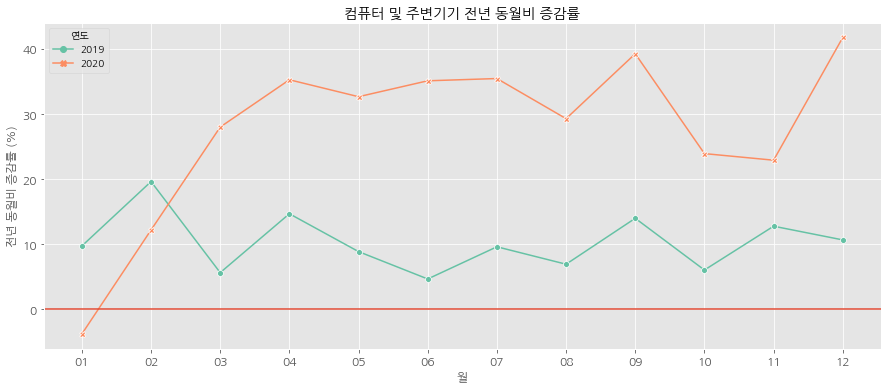

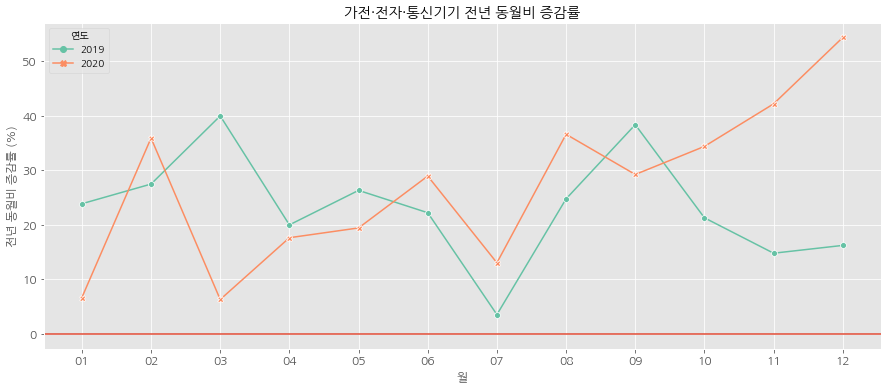

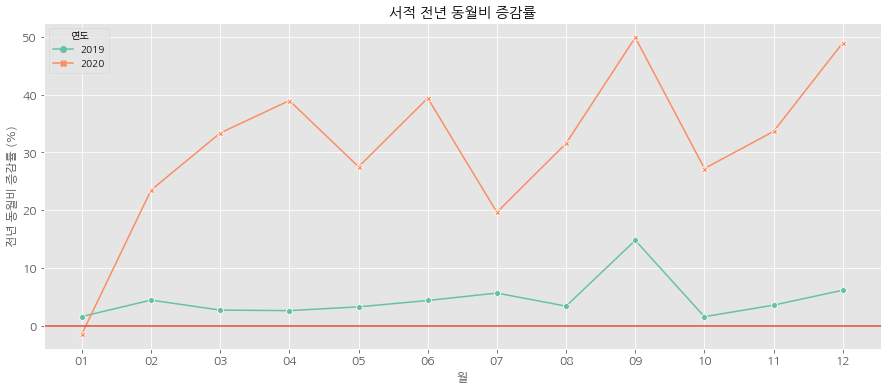

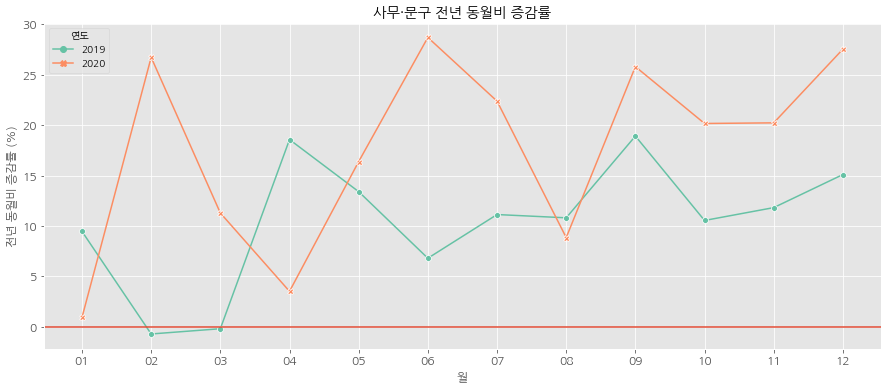

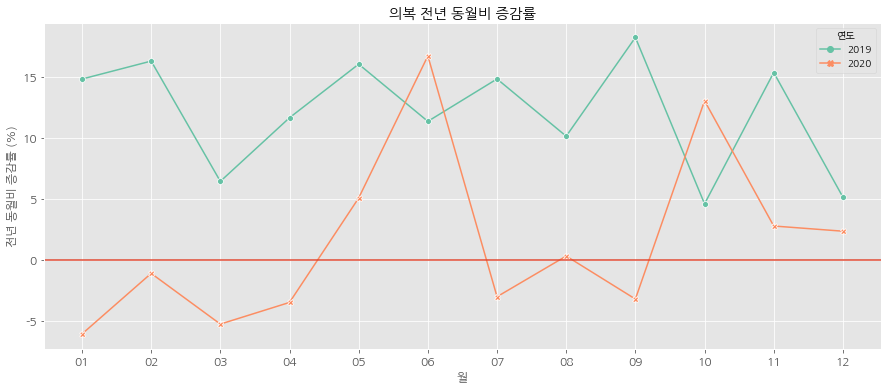

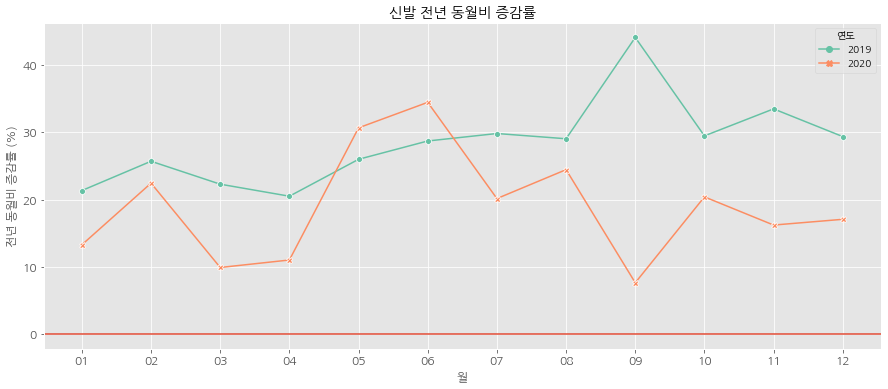

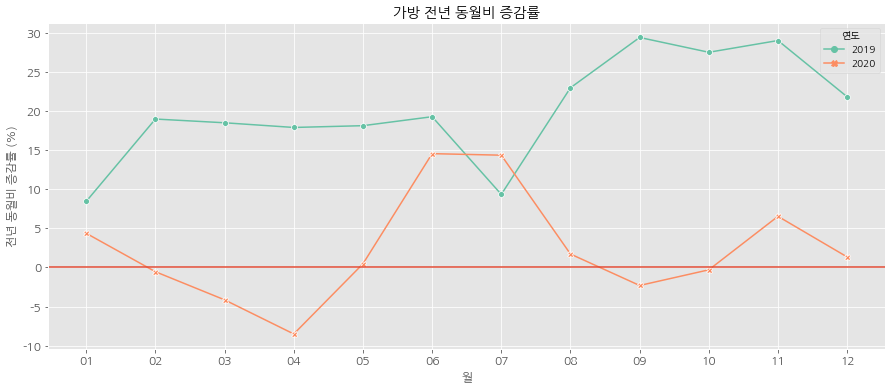

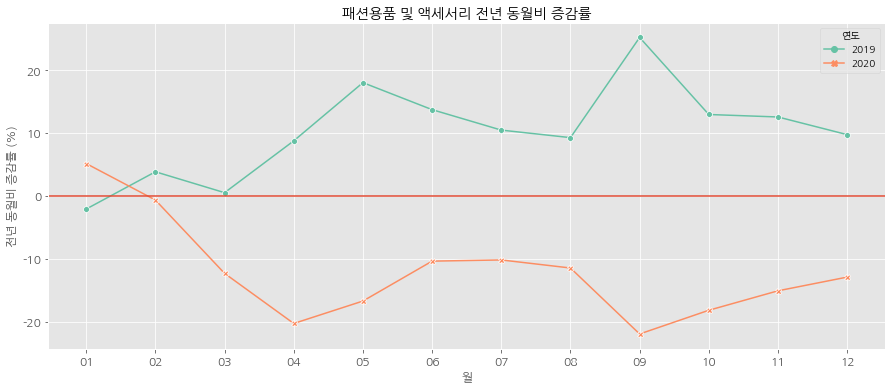

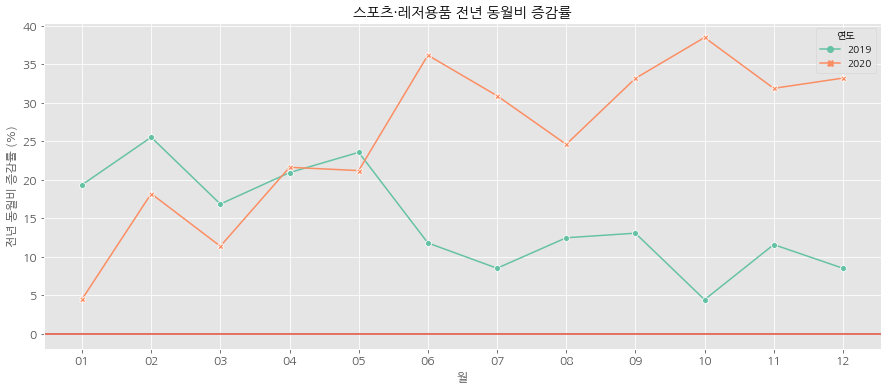

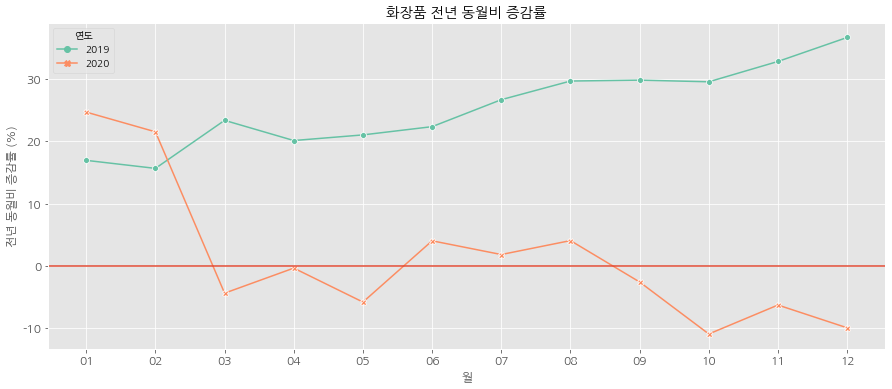

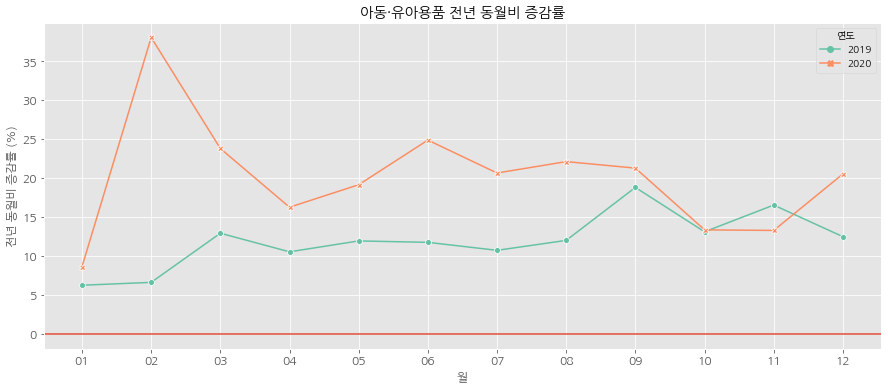

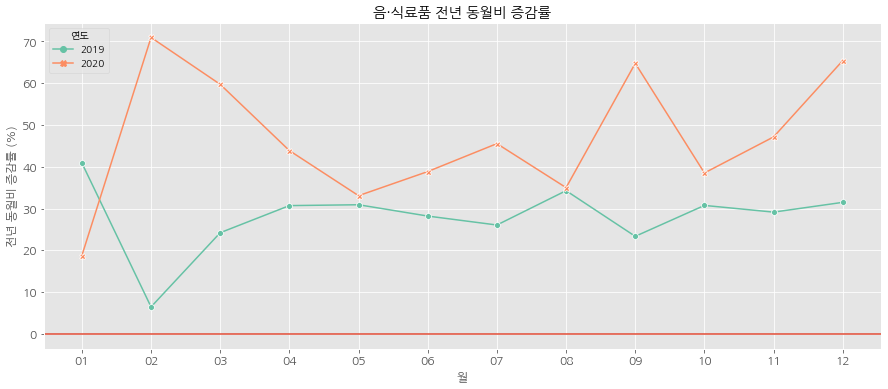

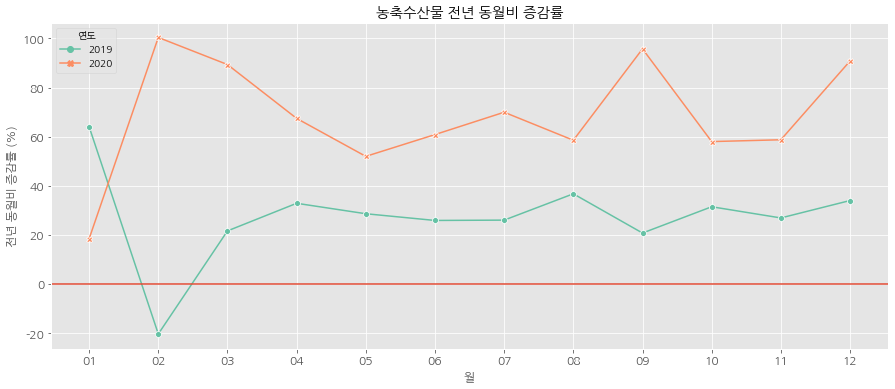

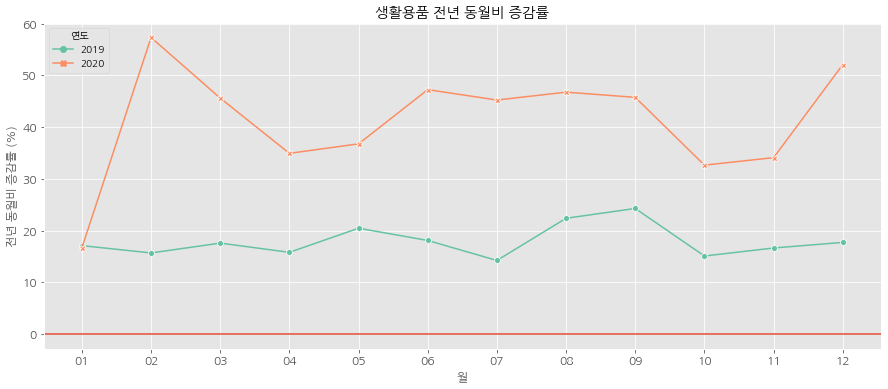

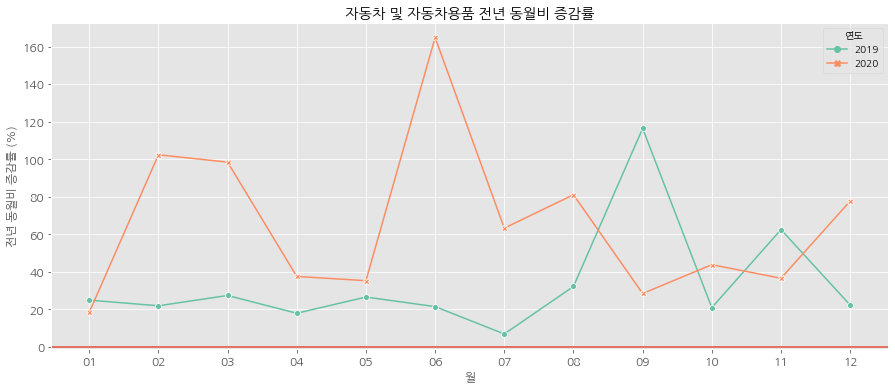

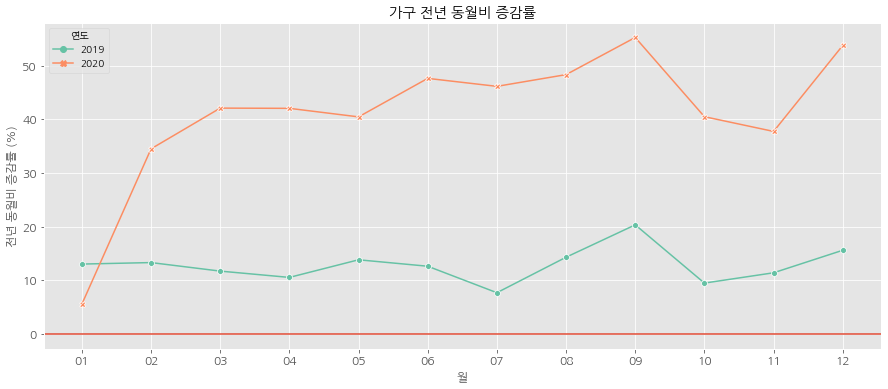

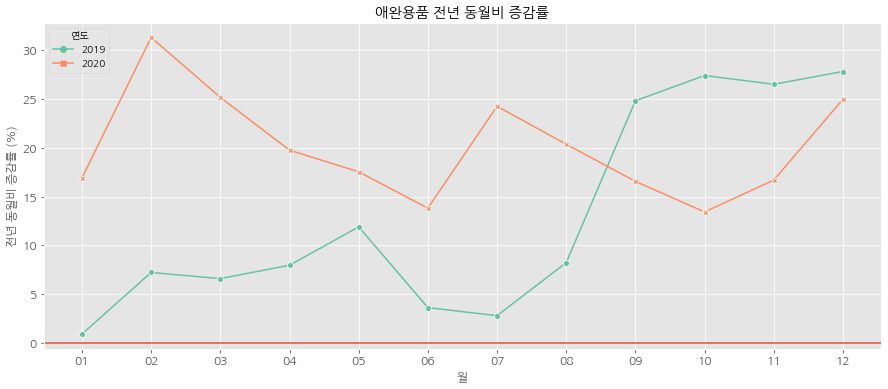

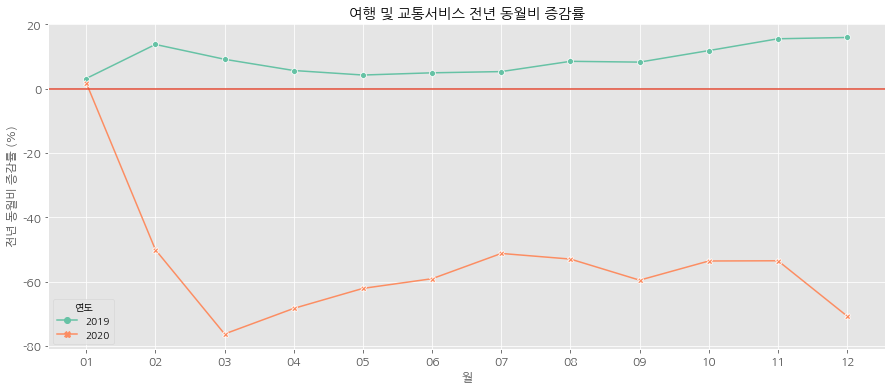

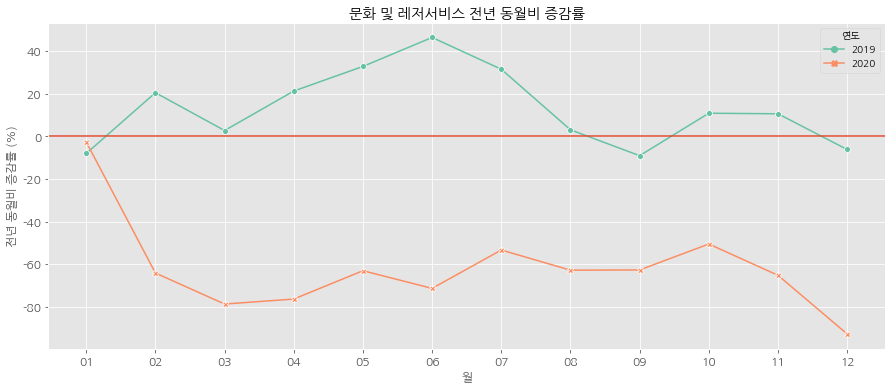

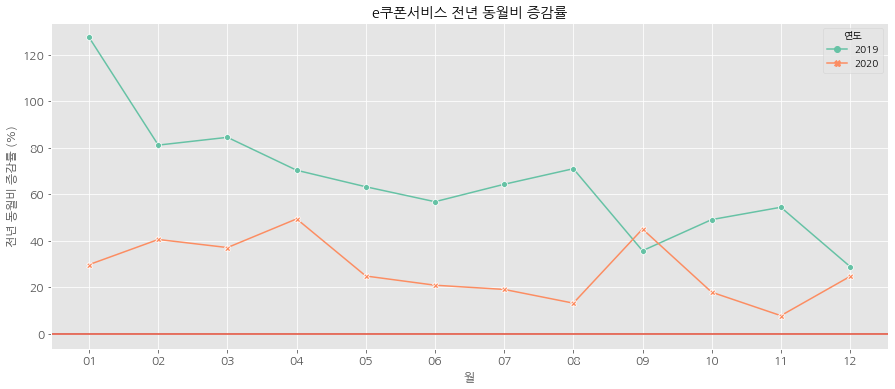

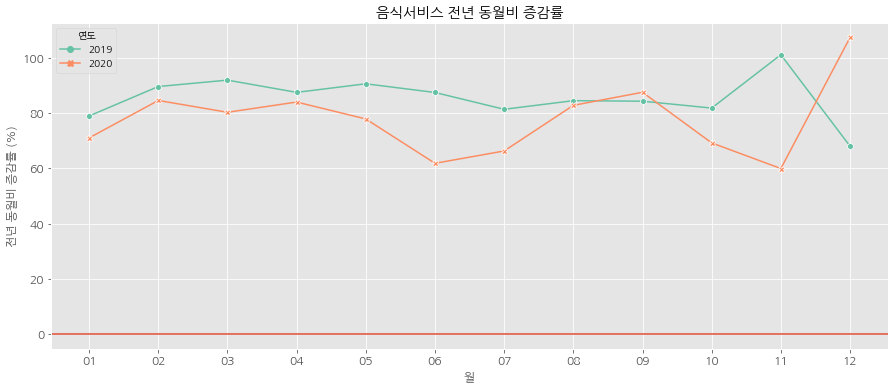

In [38]:
# 데이터프레임 rate_by_month_cat 생성

drop_df = df.copy()     # df 프레임을 복사해 합계, 기타, 기타서비스 카테고리를 제외한 drop_df 생성
drop_df.drop('합계', axis=0, inplace=True)
drop_df.drop('기타', axis=0, inplace=True)
drop_df.drop('기타서비스', axis=0, inplace=True)

year = [2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020]     # 연 리스트 생성

month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']     # 월 리스트 생성

rate_by_month_cat = []     # 상품군마다 전년 동월비 증감률을 순서대로 저장하는 리스트 생성
for i in range(21):     # 총 23개 상품군 중 합계, 기타, 기타서비스 제외한 20개 상품군
    for x in range(12):     # 2019년 전년 동월비 증감률 먼저 기록(2019. 01 ~ 2019. 12)
        rate_by_month_cat.append( ( ( df.loc[(drop_df.index[i*3][0], "계"), "2019. %s" % (month[x])] - df.loc[(drop_df.index[i*3][0], "계"), "2018. %s" % (month[x])] )
                      / df.loc[(drop_df.index[i*3][0], "계"), "2018. %s" % (month[x])] ) * 100)
    for x in range(12):     # 2020년 전년 동월비 증감률 기록(2020. 01 ~ 2020. 12)
        rate_by_month_cat.append( ( ( df.loc[(drop_df.index[i*3][0], "계"), "2020. %s" % (month[x])] - df.loc[(drop_df.index[i*3][0], "계"), "2019. %s" % (month[x])] )
                      / df.loc[(drop_df.index[i*3][0], "계"), "2019. %s" % (month[x])] ) * 100)

rate_by_month_cat_data = {
    "연도" : year*21,
    "월별" : month*42,
    "전년 동월비 증감률" : rate_by_month_cat
}     # 기반 데이터 작성

rate_by_month_cat_df = pd.DataFrame(rate_by_month_cat_data)     # 데이터프레임 생성
#display(rate_by_month_cat_df)     # 데이터프레임 생성 확인


# 상품군별 전년 동월비 거래액 증감률 시각화

for i in range(21):     # 20개 상품군 개별자료 생성
    ax = plt.subplots()
    ax = sns.lineplot(data=rate_by_month_cat_df[i*24:(i+1)*24], x="월별", y="전년 동월비 증감률", hue="연도", style="연도", markers=True, dashes=False, palette='Set2')     # 연도별 라인 생성
    ax.set_title(str(drop_df.index[i*3][0]) + ' 전년 동월비 증감률')     # 타이틀 = (상품군명) 전년 동월비 증감률
    ax.set_xlabel('월')     # X축 라벨 = 월
    ax.set_ylabel('전년 동월비 증감률 (%)')     # Y축 라벨 = 전년 동월비 증감률
    ax.axhline(0)     # Y축 0에 수평선 긋기
    plt.savefig(str(drop_df.index[i*3][0]) + ' 전년 동월비 증감률.png')      # 생성된 차트 저장
    plt.show()